### 1. Importing libraries and Fetching data from 'titanic.csv'

In [197]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math

plt.style.use('ggplot')

In [199]:
titanic_data=pd.read_csv('titanic.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 2. Doing some Analysis on the data

In [200]:
print(f"total number of passangers: {len(titanic_data.index)}")

total number of passangers: 891


In [201]:
survived_count = titanic_data[titanic_data['Survived'] == 1].shape[0]
print(survived_count)

342


<Axes: xlabel='Survived', ylabel='count'>

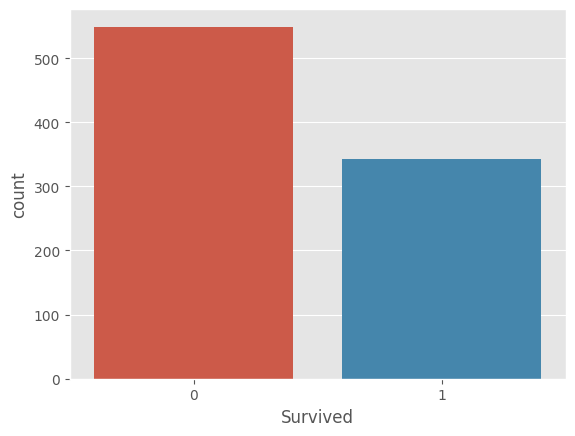

In [202]:
sns.countplot(x="Survived", data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

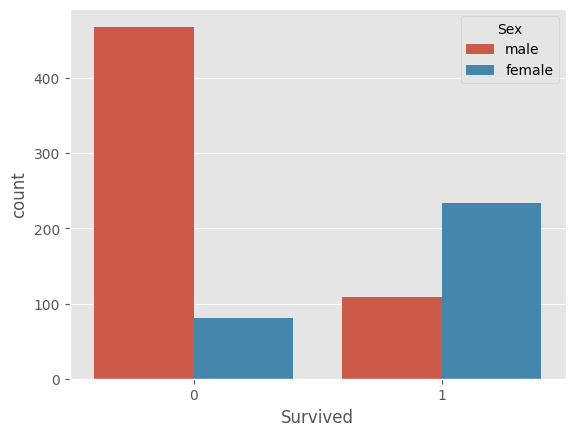

In [203]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

**From this graph we can say that more females survivied compared to male**

<Axes: xlabel='Survived', ylabel='count'>

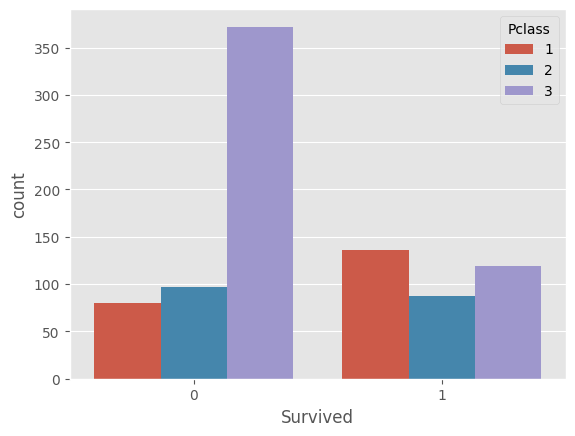

In [204]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

**From this graph we can say that more passengers of the first class survived compared to second and third**

<Axes: ylabel='Frequency'>

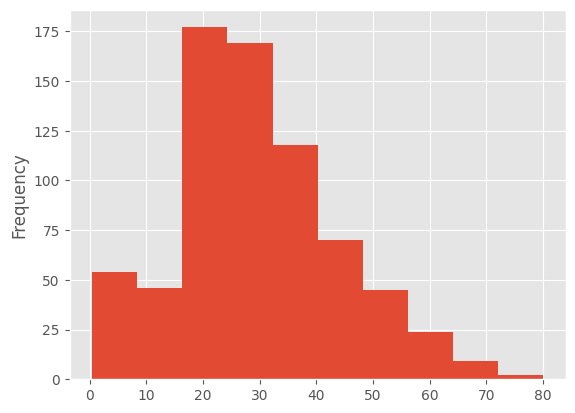

In [205]:
titanic_data["Age"].plot.hist()

<Axes: ylabel='Frequency'>

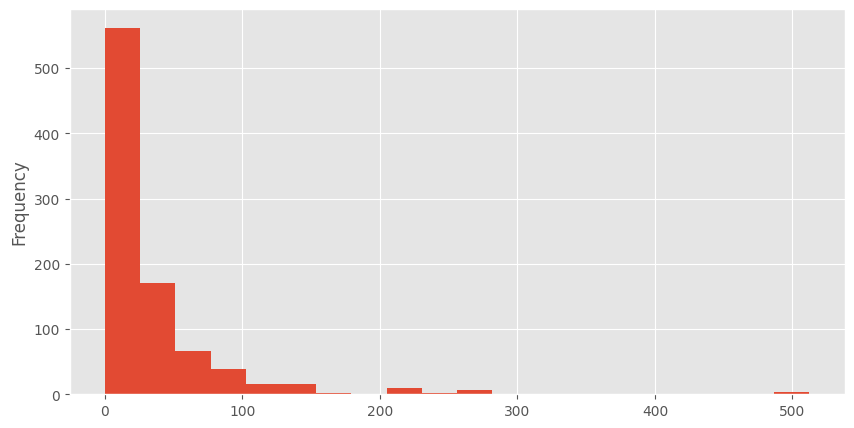

In [206]:
titanic_data["Fare"].plot.hist(bins=20, figsize=(10,5))

### 3. Cleaning the data

In [207]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

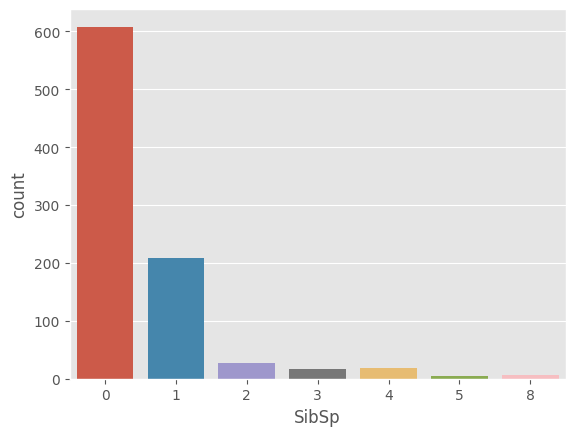

In [208]:
sns.countplot(x="SibSp", data=titanic_data)

In [209]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [210]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

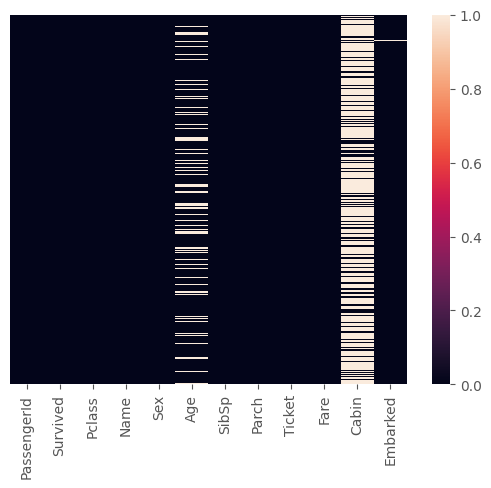

In [211]:
sns.heatmap(titanic_data.isnull(), yticklabels=False)

<Axes: >

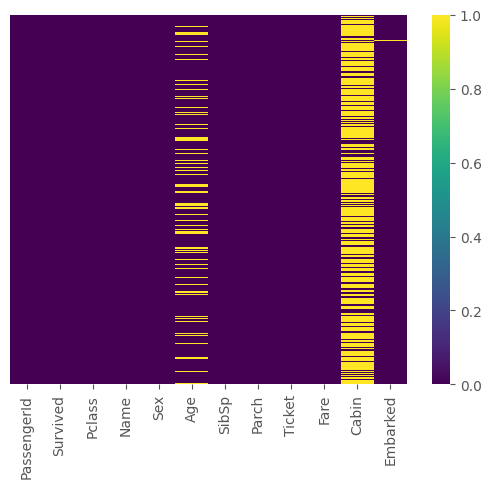

In [212]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")

<Axes: xlabel='Pclass', ylabel='Age'>

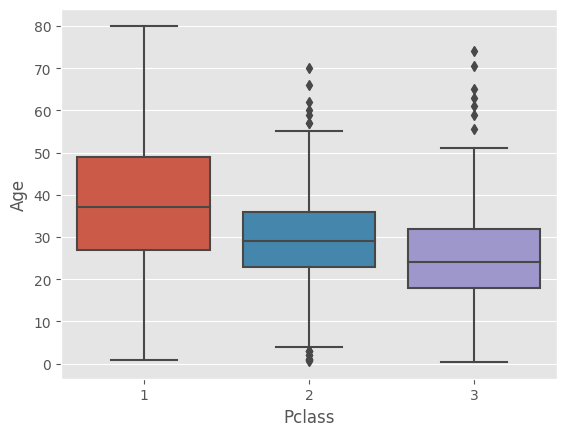

In [213]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data)

**We can say that passengers in first class have a higher age then ohters**

In [214]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [215]:
titanic_data.drop("Cabin", axis=1, inplace=True)

In [216]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [217]:
titanic_data.dropna(inplace=True)

<Axes: >

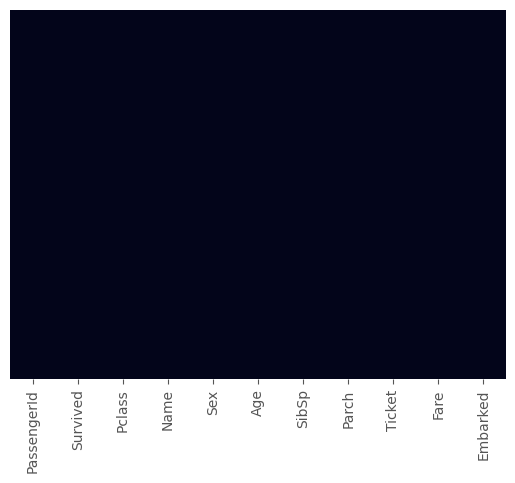

In [218]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

***Cleaned the data, we have so cell that is null now**

In [219]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [220]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [221]:
pd.get_dummies(titanic_data['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
885,True,False
886,False,True
887,True,False
889,False,True


In [222]:
sex= pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head(5)

,male
0,True
1,False
2,False
3,False
4,True


In [223]:
embark= pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark.head(5)

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [224]:
Pcl= pd.get_dummies(titanic_data['Pclass'],drop_first=True)
Pcl.head(5)

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True


In [225]:
titanic_data=pd.concat([titanic_data, sex, embark, Pcl], axis=1)

In [226]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True,False,True


In [227]:
titanic_data.drop(['Sex', 'Embarked', 'PassengerId', 'Name', 'Ticket'],axis=1,inplace=True)

In [228]:
titanic_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,True,False,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,3,35.0,0,0,8.0500,True,False,True,False,True


In [229]:
titanic_data.drop('Pclass', axis=1, inplace= True)

In [230]:
titanic_data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


In [231]:
titanic_data.drop(['Fare', 'Age'], axis=1, inplace= True)
titanic_data.head(5)

,Survived,SibSp,Parch,male,Q,S,2,3
0,0,1,0,True,False,True,False,True
1,1,1,0,False,False,False,False,False
2,1,0,0,False,False,True,False,True
3,1,1,0,False,False,True,False,False
4,0,0,0,True,False,True,False,True


**Train the data**

In [232]:
X = titanic_data.drop("Survived", axis=1)
y = titanic_data["Survived"]

### Split the data in training and testing set

In [233]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [234]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



### 5. Perform Logistical regression

In [236]:
from sklearn.linear_model import LogisticRegression

In [237]:
model=LogisticRegression()

In [238]:
X_train

,SibSp,Parch,male,Q,S,2,3
699,0,0,True,False,True,False,True
642,3,2,False,False,True,False,True
434,1,0,True,False,True,False,False
203,0,0,True,False,False,False,True
586,0,0,True,False,True,True,False
...,...,...,...,...,...,...,...
182,4,2,True,False,True,False,True
809,1,0,False,False,True,False,False
94,0,0,True,False,True,False,True
292,0,0,True,False,False,True,False


In [243]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


In [241]:
model.fit(X_train, y_train)

LogisticRegression()

In [244]:
y_pred = model.predict(X_test)


### 5. Calculating Accuracy

In [246]:
from sklearn.metrics import accuracy_score, classification_report

In [247]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


In [248]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


In [249]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       126
           1       0.74      0.70      0.72        88

    accuracy                           0.78       214
   macro avg       0.77      0.76      0.77       214
weighted avg       0.77      0.78      0.77       214



### Submitted By Pulkit Batra (2021UCA1804)